In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

# Import data

In [2]:
df=pd.read_csv("/Users/raphaelletoubiana/Desktop/Harvard/CS109A/project/merged_df_final.csv")

In [3]:
df

,Unnamed: 0,President_winning,Date,NAP06,NAP07,NAP08,NAP09,NAP10,Current_President_Seeking_Reelection,Early_Stopping_Previous,2nd_Mandate_Prev_Pres,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9,Name,Year,Winner,Democrat_Republican,popular_votes,popular_vote_percentage,El_winner
0,0,Truman,1948,0.48,0.52,0.60,0.65,0.68,0.0,0.0,0.0,2238.932,2068.901,2055.103,2086.017,2120.450,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,45.000000,NaN,38.000000,37.000000,36.500000,39.500000,Harry S. Truman,1948,1,1,24179347,49.55,1
1,1,Truman,1948,0.48,0.52,0.60,0.65,0.68,0.0,0.0,0.0,2238.932,2068.901,2055.103,2086.017,2120.450,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,50.000000,NaN,49.000000,48.000000,48.500000,46.500000,Thomas E. Dewey,1948,0,0,21991292,45.07,0
2,2,Eisenhower,1952,0.33,0.34,0.32,0.31,0.30,0.0,0.0,1.0,2102.251,2383.291,2513.690,2540.550,2546.022,2564.401,2648.621,42942,46706,48006,48924,49320,49597,0.8,9.2,3.4,3.5,0.1288,0.1763,0.1437,0.0842,50.667000,49.500000,59.000000,50.000000,NaN,55.000000,Dwight D. Eisenhower,1952,1,0,34075529,55.18,1
3,3,Eisenhower,1952,0.33,0.34,0.32,0.31,0.30,0.0,0.0,1.0,2102.251,2383.291,2513.690,2540.550,2546.022,2564.401,2648.621,42942,46706,48006,48924,49320,49597,0.8,9.2,3.4,3.5,0.1288,0.1763,0.1437,0.0842,39.333000,39.500000,31.000000,43.000000,NaN,40.500000,Aldai Stevenson II,1952,0,1,27375090,44.33,0
4,4,Eisenhower,1956,0.68,0.70,0.72,0.74,0.76,1.0,0.0,0.0,2662.482,2735.091,2914.993,2903.671,2927.665,2925.035,2973.179,50240,48942,51429,52631,52604,52777,4.8,1.4,6.7,4.8,-0.0377,0.4396,0.2077,0.0227,51.000000,59.000000,62.000000,61.000000,52.000000,52.000000,Dwight D. Eisenhower,1956,1,0,35579180,57.37,1
5,5,Eisenhower,1956,0.68,0.70,0.72,0.74,0.76,1.0,0.0,0.0,2662.482,2735.091,2914.993,2903.671,2927.665,2925.035,2973.179,50240,48942,51429,52631,52604,52777,4.8,1.4,6.7,4.8,-0.0377,0.4396,0.2077,0.0227,41.000000,40.000000,36.000000,37.000000,41.000000,40.500000,Aldai Stevenson II,1956,0,1,26028028,41.97,0
6,6,JFK,1960,0.48,0.63,0.60,0.56,0.58,0.0,0.0,1.0,2983.727,3063.085,3203.759,3275.757,3258.088,3274.029,3232.009,52763,51485,53358,54272,54227,54142,2.6,1.0,4.4,2.6,-0.1277,0.3396,0.1640,-0.0934,49.000000,51.000000,50.000000,50.000000,45.500000,47.000000,John F. Kennedy,1960,1,1,34220984,49.72,1
7,7,JFK,1960,0.48,0.63,0.60,0.56,0.58,0.0,0.0,1.0,2983.727,3063.085,3203.759,3275.757,3258.088,3274.029,3232.009,52763,51485,53358,54272,54227,54142,2.6,1.0,4.4,2.6,-0.1277,0.3396,0.1640,-0.0934,45.500000,49.000000,46.000000,46.000000,48.500000,47.000000,Richard Nixon,1960,0,0,34108157,49.55,0
8,8,Johnson,1964,0.69,0.68,0.67,0.68,0.67,1.0,1.0,0.0,3438.721,3586.827,3771.845,3851.366,3893.296,3954.121,3966.335,54522,56041,57283,58619,58903,58793,3.5,4.9,3.8,7.1,0.1871,-0.1081,0.1700,0.1457,64.000000,64.000000,76.500000,60.500000,65.000000,63.500000,Lyndon B. Johnson,1964,1,1,43127041,61.05,1
9,9,Johnson,1964,0.69,0.68,0.67,0.68,0.67,1.0,1.0,0.0,3438.721,3586.827,3771.845,3851.366,3893.296,3954.121,3966.335,54522,56041,57283,58619,58903,58793,3.5,4.9,3.8,7.1,0.1871,-0.1081,0.1700,0.1457,29.000000,36.000000,19.000000,28.500000,29.000000,30.500000,Barry Goldwater,1964,0,0,27175754,38.47,0


In [4]:
X_train=df.iloc[4:len(df)-2].drop(["popular_votes", "Unnamed: 0", "President_winning", "Date", "Name", "Year", "Winner", "El_winner", "popular_vote_percentage"], axis=1)
y_train=df.iloc[4:len(df)-2]["popular_vote_percentage"]

X_test=df.iloc[len(df)-2:len(df)].drop(["popular_votes", "Unnamed: 0", "President_winning", "Date", "Name", "Year", "Winner", "El_winner", "popular_vote_percentage"], axis=1)
y_test=df.iloc[len(df)-2:len(df)]["popular_vote_percentage"]

# 1st model without data preprocessing

## Linear model

In [55]:
lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_test = lin.predict(X_test) 
y_pred_train = lin.predict(X_train) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

print(y_pred_test)
print(mse)
#scores.append([mse, y_pred_test[0], y_pred_test[1]])
#names.append('Simple linear regression with 5 scaled PCs')
#df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
#df_results

[144.48626371 151.05062546]
2.039048233477872


# Transform the data

## Scaler

In [5]:
colnames=[X_train.keys().tolist()]
scale_MinMax=MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scale_MinMax.transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scale_MinMax.transform(X_test), columns=colnames)

In [6]:
X_train_scaled.head()

,NAP06,NAP07,NAP08,NAP09,NAP10,Current_President_Seeking_Reelection,Early_Stopping_Previous,2nd_Mandate_Prev_Pres,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9,Democrat_Republican
0,0.972973,1.000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.813333,0.357143,1.000000,0.640625,0.300467,1.000000,0.567201,0.603342,0.628571,0.836680,0.747826,1.000000,0.638889,0.674646,0.0
1,0.972973,1.000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.813333,0.357143,1.000000,0.640625,0.300467,1.000000,0.567201,0.603342,0.342857,0.216062,0.295652,0.261538,0.333333,0.349292,1.0
2,0.432432,0.825,0.720930,0.581395,0.632653,0.0,0.0,1.0,0.022944,0.022765,0.019780,0.025295,0.022416,0.023518,0.017368,0.029067,0.027983,0.021161,0.017834,0.017582,0.014791,0.520000,0.300000,0.616667,0.296875,0.100156,0.860199,0.459433,0.409357,0.571429,0.575367,0.539130,0.661538,0.458333,0.533188,1.0
3,0.432432,0.825,0.720930,0.581395,0.632653,0.0,0.0,1.0,0.022944,0.022765,0.019780,0.025295,0.022416,0.023518,0.017368,0.029067,0.027983,0.021161,0.017834,0.017582,0.014791,0.520000,0.300000,0.616667,0.296875,0.100156,0.860199,0.459433,0.409357,0.471429,0.510039,0.469565,0.538462,0.541667,0.533188,0.0
4,1.000000,0.950,0.883721,0.860465,0.816327,1.0,1.0,0.0,0.055441,0.059116,0.058692,0.064427,0.065509,0.069348,0.066641,0.049332,0.078117,0.064218,0.065076,0.068236,0.065190,0.640000,0.857143,0.516667,1.000000,0.800801,0.234307,0.474229,0.808855,1.000000,1.000000,1.000000,0.984615,1.000000,1.000000,1.0


# PCA

Text(0, 0.5, 'PCA Dimention 2')

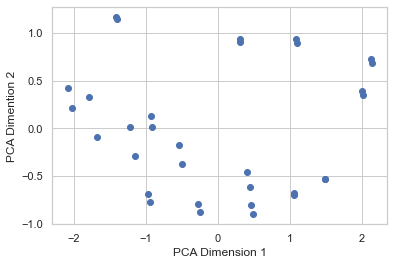

In [9]:
pca_transformer = PCA().fit(X_train_scaled)
X_train_pca = pca_transformer.transform(X_train_scaled)
X_test_pca = pca_transformer.transform(X_test_scaled)
# notice that we set up lists to track each group's plotting color and label
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])

# all plots need labels
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")

Text(0.5, 1.0, 'Weights of features in the 2 first PCs')

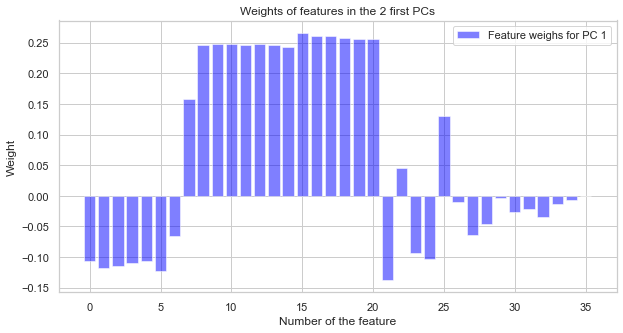

In [10]:
feature_weights_0=pca_transformer.components_[0]
#feature_weights_1=pca_transformer.components_[1]
x=np.asarray(range(len(feature_weights_0)))
#idx = np.argsort(feature_weights_0)

#feature_weights_0 = feature_weights_0[idx]

plt.figure(figsize=(10,5))
plt.bar(range(len(feature_weights_0)),feature_weights_0, color='blue', alpha=0.5, label='Feature weighs for PC 1')
#plt.bar(range(len(feature_weights_0)),feature_weights_1, color='red', alpha=0.5, label='Feature weighs for PC 2')
plt.xlabel('Number of the feature')
plt.ylabel('Weight')
plt.legend()
plt.title("Weights of features in the 2 first PCs")

In [11]:
var_explained = pca_transformer.explained_variance_ratio_
print("Variance explained by the 2 first PCA components is:", round(var_explained[0]+var_explained[1],2))

Variance explained by the 2 first PCA components is: 0.61


In [12]:
max=0.9
sum=0
i=0
while sum < max:
    sum+=var_explained[i]
    i+=1
print('The number of PCA vectors needed so that 90% of the variability in the predictors is explained is:', i)

The number of PCA vectors needed so that 90% of the variability in the predictors is explained is: 7


Text(0.5, 1.0, 'Cumulative explained variability against the number of PCA components used ')

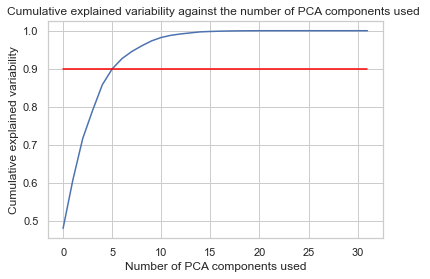

In [13]:
number_pca=[i for i in range(len(var_explained))]
cumulative_var_explained=[]
s=0
for i in range(len(var_explained)):
    s+=var_explained[i]
    cumulative_var_explained.append(s)

line=[0.9 for i in range(len(var_explained))]

plt.plot(number_pca,cumulative_var_explained, label='Explained variance')
plt.plot(number_pca,line, color='red', label='90% explained variance')
plt.xlabel('Number of PCA components used')
plt.ylabel('Cumulative explained variability')
plt.title('Cumulative explained variability against the number of PCA components used ')

Text(0.5, 1.0, 'Explained variability in the predictors against the number of PCA components used ')

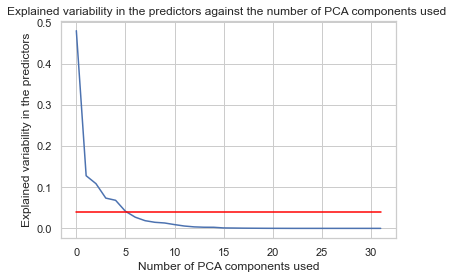

In [14]:
line=[0.04 for i in range(len(var_explained))]
plt.plot(number_pca,var_explained, label='Explained variance')
plt.plot(number_pca,line, color='red', label='5% explained variance')
plt.xlabel('Number of PCA components used')
plt.ylabel('Explained variability in the predictors')
plt.title('Explained variability in the predictors against the number of PCA components used ')

In [15]:
sum_for_5_components=0
for i in range(5):
    sum_for_5_components+=var_explained[i]
print(round(100*sum_for_5_components,1),'% of the variability is explained with 5 components')

85.8 % of the variability is explained with 5 components


We will test 3 number of PCs:
- 2 that explain 61% of the variance
- 7 that explain 90% of the variance
- 5 that explain 85.8% of the variance

# Models

In [31]:
x_2=X_train_pca[:,0:2]
x_5=X_train_pca[:,0:5]
x_7=X_train_pca[:,0:7]

x_2_test=X_test_pca[:,0:2]
x_5_test=X_test_pca[:,0:5]
x_7_test=X_test_pca[:,0:7]

## Linear regression

In [32]:
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### With 2 PCs

In [33]:
lin_2 = LinearRegression()
lin_2.fit(x_2, y_train)

y_pred_test = lin_2.predict(x_2_test) 
y_pred_train = lin_2.predict(x_2) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores = [[mse, y_pred_test[0], y_pred_test[1]]]
names = ['Simple linear regression with 2 scaled PCs']
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932


### With 5 PCs

In [34]:
lin_5 = LinearRegression()
lin_5.fit(x_5, y_train)

y_pred_test = lin_5.predict(x_5_test) 
y_pred_train = lin_5.predict(x_5) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Simple linear regression with 5 scaled PCs')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721


### With 7 PCs

In [35]:
lin_7 = LinearRegression()
lin_7.fit(x_7, y_train)

y_pred_test = lin_7.predict(x_7_test) 
y_pred_train = lin_7.predict(x_7) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Simple linear regression with 7 scaled PCs')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729


## Lasso reggularization

### With 2 PCs

In [36]:
lasso_reg_2 = Lasso(alpha=0.008, normalize=True)
lasso_reg_2.fit(x_2, y_train)

y_pred_test = lasso_reg_2.predict(x_2_test)
y_pred_train = lasso_reg_2.predict(x_2)

mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 2 scaled PCs, alpha=0.008')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729
"Lasso regression with 2 scaled PCs, alpha=0.008",35.130219,45.231506,45.474039


In [37]:
from sklearn.linear_model import LassoCV

alphas=[0.001,0.01, 0.1, 1, 10, 100]

lasso_reg_2 = LassoCV(cv=2, alphas=alphas)
lasso_reg_2.fit(x_2, y_train)

y_pred_test = lasso_reg_2.predict(x_2_test)
y_pred_train = lasso_reg_2.predict(x_2)

mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 2 scaled PCs, cv=1')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729
"Lasso regression with 2 scaled PCs, alpha=0.008",35.130219,45.231506,45.474039
"Lasso regression with 2 scaled PCs, cv=1",37.590458,47.578914,47.597926


### With 5 PCs

In [38]:
lasso_reg_5 = Lasso(alpha=0.008, normalize=True)
lasso_reg_5.fit(x_5, y_train)

y_pred_test = lasso_reg_5.predict(x_5_test) 
y_pred_train = lasso_reg_5.predict(x_5) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 5 scaled PCs')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729
"Lasso regression with 2 scaled PCs, alpha=0.008",35.130219,45.231506,45.474039
"Lasso regression with 2 scaled PCs, cv=1",37.590458,47.578914,47.597926
Lasso regression with 5 scaled PCs,6.183760,46.705702,51.117324


In [39]:
alphas=[0.001,0.01, 0.1, 1, 10, 100]

lasso_reg_5 = LassoCV(cv=2, alphas=alphas)
lasso_reg_5.fit(x_5, y_train)

y_pred_test = lasso_reg_5.predict(x_5_test)
y_pred_train = lasso_reg_5.predict(x_5)

mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 5 scaled PCs, cv=2')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729
"Lasso regression with 2 scaled PCs, alpha=0.008",35.130219,45.231506,45.474039
"Lasso regression with 2 scaled PCs, cv=1",37.590458,47.578914,47.597926
Lasso regression with 5 scaled PCs,6.183760,46.705702,51.117324
"Lasso regression with 5 scaled PCs, cv=2",6.174902,46.645867,51.059016


### With 7 PCs

In [40]:
lasso_reg_7 = Lasso(alpha=0.008, normalize=True)
lasso_reg_7.fit(x_7, y_train)

y_pred_test = lasso_reg_7.predict(x_7_test) 
y_pred_train = lasso_reg_7.predict(x_7) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 7 scaled PCs, alpha=0.008')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729
"Lasso regression with 2 scaled PCs, alpha=0.008",35.130219,45.231506,45.474039
"Lasso regression with 2 scaled PCs, cv=1",37.590458,47.578914,47.597926
Lasso regression with 5 scaled PCs,6.183760,46.705702,51.117324
"Lasso regression with 5 scaled PCs, cv=2",6.174902,46.645867,51.059016
"Lasso regression with 7 scaled PCs, alpha=0.008",5.013243,46.595713,51.542364


In [41]:
alphas=[0.001,0.01, 0.1, 1, 10, 100]

lasso_reg_7 = LassoCV(cv=2, alphas=alphas)
lasso_reg_7.fit(x_7, y_train)

y_pred_test = lasso_reg_7.predict(x_7_test)
y_pred_train = lasso_reg_7.predict(x_7)

val_mse=lasso_reg_7.score(x_7, y_train)
mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 7 scaled PCs, cv=2')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729
"Lasso regression with 2 scaled PCs, alpha=0.008",35.130219,45.231506,45.474039
"Lasso regression with 2 scaled PCs, cv=1",37.590458,47.578914,47.597926
Lasso regression with 5 scaled PCs,6.183760,46.705702,51.117324
"Lasso regression with 5 scaled PCs, cv=2",6.174902,46.645867,51.059016
"Lasso regression with 7 scaled PCs, alpha=0.008",5.013243,46.595713,51.542364
"Lasso regression with 7 scaled PCs, cv=2",5.314507,46.695320,51.509925


In [48]:
lasso_reg_7.alpha_

0.1

In [43]:
val_mse=lasso_reg_7.score(x_7, y_train)
val_mse

0.8601322037266359

In [44]:
val_mse=lasso_reg_7.mse_path_

In [45]:
val_mse

array([[59.80130312, 17.66399414],
       [59.80130312, 17.66399414],
       [59.37437256, 10.21277134],
       [14.90506484, 11.76807962],
       [13.72042639, 20.00191589],
       [16.22169915, 21.07950501]])

In [47]:
val_mse.mean(axis=1)

array([38.73264863, 38.73264863, 34.79357195, 13.33657223, 16.86117114,
       18.65060208])

### Without PCA

In [49]:
alphas=[0.001,0.01, 0.1, 1, 10, 100]

lasso_reg = LassoCV(cv=2, alphas=alphas)
lasso_reg.fit(X_train_scaled, y_train)

y_pred_test = lasso_reg.predict(X_test_scaled)
y_pred_train = lasso_reg.predict(X_train_scaled)

mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression without PCA, cv=2')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,35.126123,45.106829,45.356932
Simple linear regression with 5 scaled PCs,6.173520,46.638309,51.050721
Simple linear regression with 7 scaled PCs,4.998907,46.514305,51.489729
"Lasso regression with 2 scaled PCs, alpha=0.008",35.130219,45.231506,45.474039
"Lasso regression with 2 scaled PCs, cv=1",37.590458,47.578914,47.597926
Lasso regression with 5 scaled PCs,6.183760,46.705702,51.117324
"Lasso regression with 5 scaled PCs, cv=2",6.174902,46.645867,51.059016
"Lasso regression with 7 scaled PCs, alpha=0.008",5.013243,46.595713,51.542364
"Lasso regression with 7 scaled PCs, cv=2",5.314507,46.695320,51.509925
"Lasso regression without PCA, cv=2",3.576733,45.816493,52.250077


In [52]:
val_mse=lasso_reg.mse_path_.mean(axis=1)

In [53]:
val_mse

array([38.73264863, 38.73264863, 32.78538567,  9.11785839, 11.26643201,
       24.95612657])

In [54]:
lasso_reg.alpha_

0.1